In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical
from kneed.knee_locator import KneeLocator

Using TensorFlow backend.


In [2]:
df = pd.read_csv("C:\\Users\\ujwal\\data\\stonybrook\\spring2020\\visualization\\assignment2\\data.csv")

In [3]:
df.shape

(500, 24)

In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long'],
      dtype='object')

In [5]:
columns = ['price', 'condition', 'fuel', 'odometer',
          'title_status', 'transmission', 'drive', 'size', 'lat', 'long']

In [6]:
data = df[columns]

In [7]:
randomSample = data.sample(frac = 0.25)

In [8]:
randomSample.shape

(125, 10)

In [9]:
data['size'].value_counts()

full-size      319
mid-size       120
compact         59
sub-compact      2
Name: size, dtype: int64

In [10]:
data['condition'] = pd.np.where(data.condition.str.contains("like new"), "5",
            pd.np.where(data.condition.str.contains("new"), "6",
            pd.np.where(data.condition.str.contains("excellent"), "4",
            pd.np.where(data.condition.str.contains("good"), "3",
            pd.np.where(data.condition.str.contains("fair"), "2",
            pd.np.where(data.condition.str.contains("salvage"), "1","0"))))))

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
data['title_status'] = pd.np.where(data.title_status.str.contains("clean"), "4",
            pd.np.where(data.title_status.str.contains("lien"), "3",
            pd.np.where(data.title_status.str.contains("rebuilt"), "2",
            pd.np.where(data.title_status.str.contains("salvage"), "1", "0"))))

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
data['size'] = pd.np.where(data['size'].str.contains("full-size"), "4",
            pd.np.where(data['size'].str.contains("mid-size"), "3",
            pd.np.where(data['size'].str.contains("sub-compact"), "1",
            pd.np.where(data['size'].str.contains("compact"), "2", "0"))))

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
data['fuel'] = LabelEncoder().fit_transform(data['fuel'])
data['transmission'] = LabelEncoder().fit_transform(data['transmission'])
data['drive'] = LabelEncoder().fit_transform(data['drive'])

C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ujwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [14]:
data.columns

Index(['price', 'condition', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'lat', 'long'],
      dtype='object')

In [15]:
oneHot_columns = ['fuel', 'transmission', 'drive']

In [16]:
fdata = pd.get_dummies(data, prefix_sep="_", columns=oneHot_columns)

In [17]:
data.columns

Index(['price', 'condition', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'lat', 'long'],
      dtype='object')

In [18]:
fdata.columns

Index(['price', 'condition', 'odometer', 'title_status', 'size', 'lat', 'long',
       'fuel_0', 'fuel_1', 'fuel_2', 'fuel_3', 'transmission_0',
       'transmission_1', 'transmission_2', 'drive_0', 'drive_1', 'drive_2'],
      dtype='object')

In [19]:
fdata = fdata[fdata.columns]

In [20]:
fdata

,price,condition,odometer,title_status,size,lat,long,fuel_0,fuel_1,fuel_2,fuel_3,transmission_0,transmission_1,transmission_2,drive_0,drive_1,drive_2
0,16500,4,109870.0,4,4,40.6260,-122.3670,0,1,0,0,1,0,0,1,0,0
1,6400,4,107000.0,4,4,39.7647,-75.5069,0,1,0,0,1,0,0,0,1,0
2,22890,4,99712.0,4,4,43.1550,-75.9513,0,1,0,0,1,0,0,1,0,0
3,5000,5,293000.0,4,3,40.2874,-84.1622,0,1,0,0,1,0,0,0,1,0
4,0,4,145001.0,4,4,35.7200,-96.9539,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1700,3,170000.0,4,3,41.2613,-95.8676,0,1,0,0,1,0,0,0,1,0
496,3995,3,130000.0,2,4,41.6122,-93.5296,0,0,0,1,1,0,0,0,1,0
497,6500,3,161000.0,4,4,35.2054,-89.8036,0,1,0,0,1,0,0,0,0,1
498,1,4,51550.0,4,3,28.4661,-81.3964,0,1,0,0,0,1,0,1,0,0


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
fdata.dtypes

price               int64
condition          object
odometer          float64
title_status       object
size               object
lat               float64
long              float64
fuel_0              uint8
fuel_1              uint8
fuel_2              uint8
fuel_3              uint8
transmission_0      uint8
transmission_1      uint8
transmission_2      uint8
drive_0             uint8
drive_1             uint8
drive_2             uint8
dtype: object

In [23]:
fdata['price'] = fdata['price'].astype(float)
fdata['condition'] = fdata['condition'].astype(float)
fdata['title_status'] = fdata['title_status'].astype(float)
fdata['size'] = fdata['size'].astype(float)

In [24]:
fdata.columns

Index(['price', 'condition', 'odometer', 'title_status', 'size', 'lat', 'long',
       'fuel_0', 'fuel_1', 'fuel_2', 'fuel_3', 'transmission_0',
       'transmission_1', 'transmission_2', 'drive_0', 'drive_1', 'drive_2'],
      dtype='object')

In [25]:
scaler = MinMaxScaler()
scaledData = pd.DataFrame(scaler.fit_transform(fdata), columns=fdata.columns)

In [26]:
scaledData

,price,condition,odometer,title_status,size,lat,long,fuel_0,fuel_1,fuel_2,fuel_3,transmission_0,transmission_1,transmission_2,drive_0,drive_1,drive_2
0,0.351101,0.6,0.061552,1.000000,1.000000,0.716904,0.384496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.136185,0.6,0.059944,1.000000,1.000000,0.687623,0.924233,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.487073,0.6,0.055861,1.000000,1.000000,0.802880,0.919114,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.106394,0.8,0.164146,1.000000,0.666667,0.705393,0.824541,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.6,0.081233,1.000000,1.000000,0.550119,0.677205,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.036174,0.4,0.095238,1.000000,0.666667,0.738502,0.689717,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
496,0.085009,0.4,0.072829,0.333333,1.000000,0.750431,0.716647,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
497,0.138313,0.4,0.090196,1.000000,1.000000,0.532624,0.759563,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
498,0.000021,0.6,0.028880,1.000000,0.666667,0.303514,0.856397,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [27]:
scaledData1 = scaledData.copy()

In [28]:
from sklearn.cluster import KMeans

In [29]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaledData)
    Sum_of_squared_distances.append(km.inertia_)

In [30]:
knee = KneeLocator(range(1, 15), Sum_of_squared_distances, curve='convex', direction='decreasing')

In [31]:
knee.knee

4

In [32]:
import matplotlib.pyplot as plt

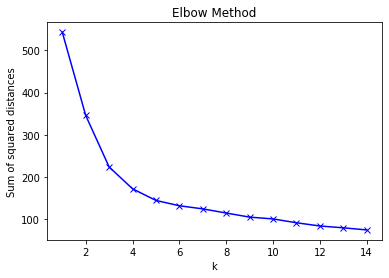

In [168]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

k=4

In [34]:
kmeans = KMeans(n_clusters = 4)
kmeans = kmeans.fit(scaledData)

In [35]:
labels = kmeans.labels_

In [36]:
scaledData['kvalue'] = kmeans.labels_

In [37]:
count = len(scaledData)/4

In [38]:
import math

In [39]:
datacount = math.floor(count/len(scaledData['kvalue'].value_counts()))

In [40]:
scaledData['kvalue'].value_counts()

1    228
0    142
2     98
3     32
Name: kvalue, dtype: int64

In [41]:
scaledData[scaledData['kvalue']==2].shape

(98, 18)

In [42]:
stratifiedData = pd.DataFrame(columns = scaledData.columns)

In [43]:
for i in scaledData.kvalue.unique():
    temp = scaledData[scaledData['kvalue']==i]
    tempData = temp.sample(n=datacount)
    stratifiedData = stratifiedData.append(tempData, ignore_index = True)

In [44]:
stratifiedData['kvalue'].value_counts()

3    31
2    31
1    31
0    31
Name: kvalue, dtype: int64

In [45]:
from sklearn import decomposition

In [46]:
def performPCA(x):
    pca = decomposition.PCA(n_components=len(x.columns))
    pcs = pca.fit_transform(x)
    pccols=[]
    for i in range(1,len(x.columns)+1):
        pccols.append('PC'+str(i))
    pcdf = pd.DataFrame(data = pcs, columns = pccols)
    return pca, pccols, pcdf

In [47]:
def plotScreePlot(pca, pccols):
    percentVariance = np.round(pca.explained_variance_ratio_ *100, decimals = 2)
    plt.bar(x= range(1,len(pccols)+1), height=percentVariance, tick_label=pccols)
    plt.ylabel('Percentate of Variance Explained')
    plt.xlabel('Principal Component')
    plt.title('PCA Scree Plot')
    plt.show()

In [48]:
scaledData1

,price,condition,odometer,title_status,size,lat,long,fuel_0,fuel_1,fuel_2,fuel_3,transmission_0,transmission_1,transmission_2,drive_0,drive_1,drive_2
0,0.351101,0.6,0.061552,1.000000,1.000000,0.716904,0.384496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.136185,0.6,0.059944,1.000000,1.000000,0.687623,0.924233,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.487073,0.6,0.055861,1.000000,1.000000,0.802880,0.919114,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.106394,0.8,0.164146,1.000000,0.666667,0.705393,0.824541,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.6,0.081233,1.000000,1.000000,0.550119,0.677205,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.036174,0.4,0.095238,1.000000,0.666667,0.738502,0.689717,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
496,0.085009,0.4,0.072829,0.333333,1.000000,0.750431,0.716647,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
497,0.138313,0.4,0.090196,1.000000,1.000000,0.532624,0.759563,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
498,0.000021,0.6,0.028880,1.000000,0.666667,0.303514,0.856397,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [49]:
stratPCA, pcColumns, stratDf = performPCA(stratifiedData.iloc[:,:-1])

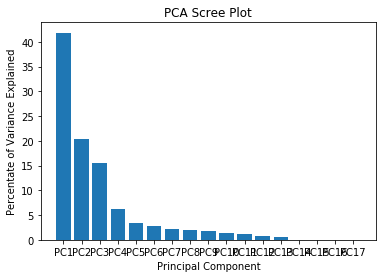

In [50]:
plotScreePlot(stratPCA, pcColumns)

In [86]:
sumOfSquaredDist = []
kRange = range(1,12)
for k in kRange:
    km = KMeans(n_clusters=k)
    km = km.fit(scaledData1)
    sumOfSquaredDist.append(km.inertia_)
knee = KneeLocator(kRange, sumOfSquaredDist, curve='convex', direction='decreasing')

kmeans = KMeans(n_clusters = knee.knee)
kmeans = kmeans.fit(scaledData1)
scaledData1['kvalue'] = kmeans.labels_	#adding labels as additional attribute
count = len(scaledData)/4	#sample size
datacount = math.floor(count/len(scaledData1['kvalue'].value_counts()))	#size of each cluster in sample
#new dataframe to save stratified sample and appending records to that dataframe
stratifiedData = pd.DataFrame(columns = scaledData1.columns)
for i in scaledData1.kvalue.unique():
    temp = scaledData1[scaledData1['kvalue']==i]
    tempData = temp.sample(n=datacount)
    stratifiedData = stratifiedData.append(tempData)

In [87]:
stratifiedData

,price,condition,odometer,title_status,size,lat,long,fuel_0,fuel_1,fuel_2,fuel_3,transmission_0,transmission_1,transmission_2,drive_0,drive_1,drive_2,kvalue
492,0.319076,0.6,0.099452,1.0,1.000000,0.792124,0.974913,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
181,0.595702,0.6,0.034168,1.0,1.000000,0.567685,0.872708,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
485,0.000000,0.6,0.025379,1.0,0.666667,0.737288,0.689811,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
330,0.074476,0.6,0.095238,1.0,1.000000,0.655344,0.587179,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
480,0.340249,0.6,0.094654,1.0,1.000000,0.793371,0.974345,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.529844,0.8,0.011333,1.0,1.000000,0.946952,0.385118,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
125,0.170210,0.6,0.026958,1.0,1.000000,0.748381,0.952467,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
398,0.531865,0.4,0.096312,1.0,1.000000,0.799610,0.917376,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
192,0.735993,0.6,0.044818,1.0,1.000000,0.533134,0.671403,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2


In [51]:
randSample = scaledData1.sample(frac=0.25)

In [83]:
randSample

,price,condition,odometer,title_status,size,lat,long,fuel_0,fuel_1,fuel_2,fuel_3,transmission_0,transmission_1,transmission_2,drive_0,drive_1,drive_2
125,0.170210,0.6,0.026958,1.000000,1.000000,0.748381,0.952467,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
291,0.000021,0.6,0.012565,1.000000,1.000000,0.303514,0.856397,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
253,0.000000,0.6,0.026032,1.000000,1.000000,0.528637,0.566573,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
430,0.142568,0.6,0.078992,1.000000,1.000000,0.421239,0.432388,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
466,0.154272,0.6,0.059384,0.333333,0.333333,0.673192,0.821804,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.500053,0.8,0.020728,1.000000,0.666667,0.568371,0.841492,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
419,0.170124,0.4,0.089636,1.000000,1.000000,0.783873,0.962015,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
47,0.102139,0.4,0.108964,1.000000,1.000000,0.604893,0.723610,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
487,0.276625,0.6,0.063305,1.000000,1.000000,0.515222,0.902831,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [52]:
randPCA, randPCCols, randDf = performPCA(randSample)

In [88]:
randDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,0.681732,-0.407057,-0.072802,1.343725,0.355303,0.050986,-0.130870,0.009621,0.085366,0.033445,0.044279,-0.262763,-0.044899,0.047683,-5.683050e-16,-2.461174e-16,-5.142044e-17
1,-0.705655,-0.054167,0.648389,-0.242825,0.693814,0.404089,0.448971,0.722280,-0.002578,-0.062672,0.071959,-0.045004,-0.038780,0.014378,-3.175146e-16,4.228228e-16,6.515200e-17
2,-0.601197,-0.167638,-0.178338,-0.140063,0.054674,0.037615,0.166740,-0.079585,0.233550,0.237039,0.020007,-0.022433,-0.081411,0.045652,5.399238e-17,-1.003197e-16,1.002348e-16
3,0.728645,-0.353022,-0.120439,0.034385,-0.045935,-0.154792,0.474653,0.004747,0.078815,0.047760,0.009474,0.026848,-0.048751,-0.014346,-9.286746e-17,1.626789e-16,5.840481e-17
4,0.861824,-0.477560,-0.019564,-0.144666,-0.160095,0.291444,-0.277759,0.028251,0.298080,-0.389751,0.048989,0.013171,0.045866,-0.009367,-4.107710e-16,4.153582e-17,5.149163e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-0.689152,0.006926,1.227192,-0.068389,-0.263579,0.023799,-0.058471,-0.134568,-0.191094,-0.063836,0.185853,-0.035064,-0.014298,0.010229,-6.428009e-17,-1.336866e-17,2.678661e-17
121,-0.635192,-0.190707,-0.168885,-0.094459,0.198387,-0.165855,-0.213227,-0.011500,0.081724,0.066388,-0.074520,0.025668,0.033870,-0.007968,4.456798e-17,2.082675e-17,2.148380e-17
122,-0.617840,-0.167942,-0.175245,-0.113966,0.135787,-0.054460,0.023001,-0.071657,0.166042,0.139760,-0.119045,0.055922,-0.000619,-0.025159,3.012360e-17,1.728024e-17,-2.395929e-18
123,-0.711824,0.060829,1.209520,-0.049319,0.013539,-0.210180,0.045235,-0.142232,0.026296,0.004791,0.091772,0.010175,-0.006469,0.002831,3.511801e-17,-8.153411e-17,2.109546e-17


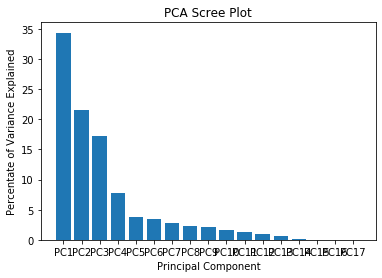

In [53]:
plotScreePlot(randPCA, randPCCols)

In [54]:
orgPCA, orgPCCols, orgDf = performPCA(scaledData1)

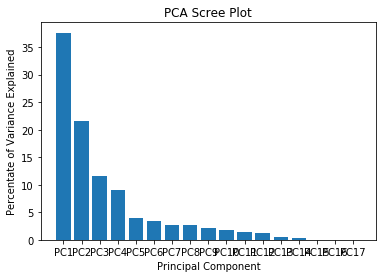

In [55]:
plotScreePlot(orgPCA, orgPCCols)

In [56]:
np.round(stratPCA.explained_variance_ratio_, decimals = 2)

array([0.42, 0.2 , 0.16, 0.06, 0.03, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01,
       0.01, 0.01, 0.  , 0.  , 0.  , 0.  ])

In [57]:
pcColumns

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17']

In [169]:
def top3Attributes(data, pca):
    sumOfSquareLoadings = pd.DataFrame(np.sum(np.square(pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_))), axis = 1))
    largest3 = sumOfSquareLoadings.nlargest(3,0)
    attrVals = data.iloc[:, largest3.index.values]
    return attrVals.columns, attrVals

In [171]:
orgCols,a = top3Attributes(scaledData1, orgPCA)
randCols,b=top3Attributes(randSample, randPCA)
stratCols,c=top3Attributes(stratifiedData, stratPCA)

In [172]:
orgCols

Index(['drive_0', 'drive_1', 'drive_2'], dtype='object')

In [174]:
randCols

Index(['drive_0', 'drive_1', 'drive_2'], dtype='object')

In [175]:
stratCols

Index(['drive_0', 'drive_1', 'fuel_1'], dtype='object')

In [58]:

from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

In [59]:
def performMDS(x, dissimilarity):
    embedding = MDS(n_components=2, dissimilarity=dissimilarity)
    if dissimilarity == 'precomputed':
        transformed = embedding.fit_transform(pairwise_distances(x))
    else:
        transformed = embedding.fit_transform(x)
    mdscols = ['D1', 'D2']
    mdsdf = pd.DataFrame(data = transformed, columns = mdscols)
    print(mdsdf.shape)
    return mdscols, mdsdf

In [60]:
estratCols, estratMDSDf = performMDS(stratifiedData.iloc[:,:-1], 'euclidean')

(124, 2)


In [64]:
estratMDSDf.to_json(orient='records')

'[{"D1":-0.2436368383,"D2":0.4323781136},{"D1":-0.2108095868,"D2":0.449601057},{"D1":-0.2306627763,"D2":0.6701412954},{"D1":-0.0728515216,"D2":0.3358584063},{"D1":-0.5546865285,"D2":0.8089283825},{"D1":-0.4784031862,"D2":-1.7082858999},{"D1":-0.2851817994,"D2":0.7117821711},{"D1":-0.3251115909,"D2":0.4605278036},{"D1":-0.4239198989,"D2":0.6843475776},{"D1":-0.0375555908,"D2":0.4295692434},{"D1":-0.2969157289,"D2":0.3074460282},{"D1":-0.2010146291,"D2":0.5294495996},{"D1":-0.086203155,"D2":0.2709465421},{"D1":-0.2044342878,"D2":0.5885233392},{"D1":-0.3142155507,"D2":0.3101539798},{"D1":-0.0602585984,"D2":0.3321613634},{"D1":0.1202751466,"D2":0.3194009445},{"D1":-0.0349748801,"D2":0.2898888943},{"D1":-0.1370102592,"D2":0.3530422285},{"D1":-0.1192771016,"D2":0.5131020624},{"D1":-0.0941986469,"D2":0.4135813034},{"D1":0.3011014473,"D2":0.4384940803},{"D1":-0.3969920231,"D2":0.4501360043},{"D1":-0.0254549085,"D2":0.2565375675},{"D1":-0.1078483817,"D2":0.3159779549},{"D1":0.0434848924,"D2":0.

In [72]:
sumOfSquareLoadings = pd.DataFrame(np.sum(np.square(pd.DataFrame(stratPCA.components_.T * np.sqrt(stratPCA.explained_variance_))), axis = 1))
largest3 = sumOfSquareLoadings.nlargest(3,0)

In [97]:
finaldata = stratifiedData.iloc[:,:-1].iloc[:, largest3.index.values]
finaldata

,drive_0,drive_1,fuel_1
492,1.0,0.0,1.0
181,1.0,0.0,1.0
485,1.0,0.0,1.0
330,1.0,0.0,1.0
480,1.0,0.0,1.0
...,...,...,...
342,1.0,0.0,0.0
125,0.0,1.0,0.0
398,1.0,0.0,0.0
192,1.0,0.0,0.0


In [166]:
def createMatrixJSONObj(dframe):
    jsonObj = []
    for i in range(0,3):
        for j in range(2,-1, -1):
            if(i==j):
                col = pd.DataFrame(dframe.iloc[:, [j]].values, columns = ['Same']) 
                jsonObj.append(pd.concat([col, dframe.iloc[:, [i]]], axis=1).to_json(orient='records'))
            else:
                jsonObj.append(dframe.iloc[:, [j, i]].to_json(orient='records'))
    return jsonObj;

In [167]:
print(createMatrixJSONObj(finaldata))

0 2
0 1
0 0
1 2
1 1
1 0
2 2
2 1
2 0
['[{"drive_1":0.0,"index":492},{"drive_1":0.0,"index":181},{"drive_1":0.0,"index":485},{"drive_1":0.0,"index":330},{"drive_1":0.0,"index":480},{"drive_1":0.0,"index":166},{"drive_1":0.0,"index":62},{"drive_1":0.0,"index":150},{"drive_1":0.0,"index":375},{"drive_1":0.0,"index":71},{"drive_1":0.0,"index":27},{"drive_1":0.0,"index":431},{"drive_1":0.0,"index":370},{"drive_1":0.0,"index":424},{"drive_1":0.0,"index":419},{"drive_1":0.0,"index":282},{"drive_1":0.0,"index":187},{"drive_1":0.0,"index":98},{"drive_1":0.0,"index":451},{"drive_1":0.0,"index":0},{"drive_1":0.0,"index":260},{"drive_1":0.0,"index":294},{"drive_1":0.0,"index":312},{"drive_1":0.0,"index":450},{"drive_1":0.0,"index":442},{"drive_1":0.0,"index":83},{"drive_1":0.0,"index":228},{"drive_1":0.0,"index":333},{"drive_1":0.0,"index":108},{"drive_1":0.0,"index":448},{"drive_1":0.0,"index":58},{"drive_1":1.0,"index":447},{"drive_1":1.0,"index":51},{"drive_1":1.0,"index":145},{"drive_1":1.0,"in

In [126]:
#new_dict = {item['name']:item for item in createMatrixJSONObj(finaldata)}
qwe = finaldata.iloc[:, [2, 0]].to_json(orient='records')
qwe[0] = '{'

TypeError: 'str' object does not support item assignment

In [127]:
finaldata.iloc[:, [2, 0]].to_json(orient='records')

'[{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":1.0},{"fuel_1":1.0,"drive_0":0.0},{"fuel_1":1.0,"drive_0":0.0},{"fuel_1":1.0,"drive_0":0.0},{"fuel_1":1.

In [93]:
finaldata.iloc[:,[2, 0]]

,fuel_1,drive_0
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
119,0.0,1.0
120,0.0,1.0
121,0.0,1.0
122,0.0,1.0


In [89]:
finaldata.columns.tolist()

['drive_0', 'drive_1', 'fuel_1']

In [81]:
[list(stratifiedData.iloc[:,:-1])[i] for i in largest3.index.values]

['drive_0', 'drive_1', 'fuel_1']

In [78]:
finaldata.columns = top3Attr
finaldata

,drive_0,drive_1,fuel_1
0,1.0,0.0,1.0
1,1.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
119,1.0,0.0,0.0
120,1.0,0.0,0.0
121,1.0,0.0,0.0
122,1.0,0.0,0.0


In [ ]:
stratDf

In [ ]:
a = pd.DataFrame(stratPCA.components_.T * np.sqrt(stratPCA.explained_variance_))

In [ ]:
a['ss'] = 0.0
for i in range(0,17):
    a['ss'] = a['ss']+a[:][i]**2

In [ ]:
a['ss'] = a['ss']**0.5

In [ ]:
a

In [ ]:
stratPCA.explained_variance_ratio_

In [ ]:
a = pd.DataFrame(stratPCA.components_)
a['ss'] = 0.0
for i in range(0,4):
    a['ss'] = a['ss']+a[:][i]**2

In [54]:
percentVariance

NameError: name 'percentVariance' is not defined